In [41]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
from scipy import optimize
from scipy import stats
plt.style.use("ggplot")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['font.family'] = 'IPAexGothic'

import warnings
warnings.filterwarnings('ignore') # warningが出ないように設定
pd.set_option("display.max_rows", None) # pandasの表示上限をなくす
pd.set_option("display.max_columns", None) # pandasの表示上限をなくす
import pickle

f = open("mean_vec_list.binaryfile",'rb')
mean_vec_list = pickle.load(f)

In [42]:
import gensim

model = gensim.models.Word2Vec.load("latest-ja-word2vec-gensim-model/word2vec.gensim.model")

In [81]:
# 入力単語

imput_word_list = ['コーヒー', "スイーツ", "アイスクリーム", "有名", "店舗"]

In [82]:
result_vec_list  = []

for w in imput_word_list:

    w_to_v = model.wv[w]

    for mean_vec in mean_vec_list:
        result_vec_plus = w_to_v - mean_vec 
        result_vec_minus =   w_to_v + mean_vec 
    
        result_vec_list.append(result_vec_plus)
        result_vec_list.append(result_vec_minus)

In [83]:
len(result_vec_list)

8940

# 計算方法

1. 入力単語に対して, 関係ベクトルを足し算and引き算=>推定用のベクトルを算出
2. 推定ベクトルと単語ベクトルで類似度が高いやつをそれぞれ3個出す
2. 出力単語の頻度
2. 

In [84]:
# 関係ベクトルと類似度が高い単語をn個上位表示

import numpy as np

output_word_list = []
max_n = 2

for vec in result_vec_list:
    most_similar = np.array(list(model.wv.most_similar([vec], [], max_n)))
    
    output_word_list.extend(most_similar[:,0].tolist())

In [85]:
#インプットした単語と同じ単語は除去

for imput_word in imput_word_list:
    output_word_list = [output_word for output_word in output_word_list if output_word != imput_word]
    print(len(output_word_list))

17497
17195
16959
16137
15428


In [86]:
len(output_word_list)

15428

In [87]:
# 登録済固有名詞リスト

f = open("koyuu_noun_list.binaryfile",'rb')
noun_list = pickle.load(f)

In [88]:
len(noun_list)

90128

In [89]:
# 固有名詞リスト外の単語は除去

output_word_list = [output_word for output_word in output_word_list if noun_list.count(output_word)>=1]

In [90]:
len(output_word_list)

3052

In [91]:
len(set(output_word_list))

1141

In [92]:
#共起単語と共起回数をdic化してまとめる

import collections

c = collections.Counter(output_word_list)

# ワードクラウドで可視化する

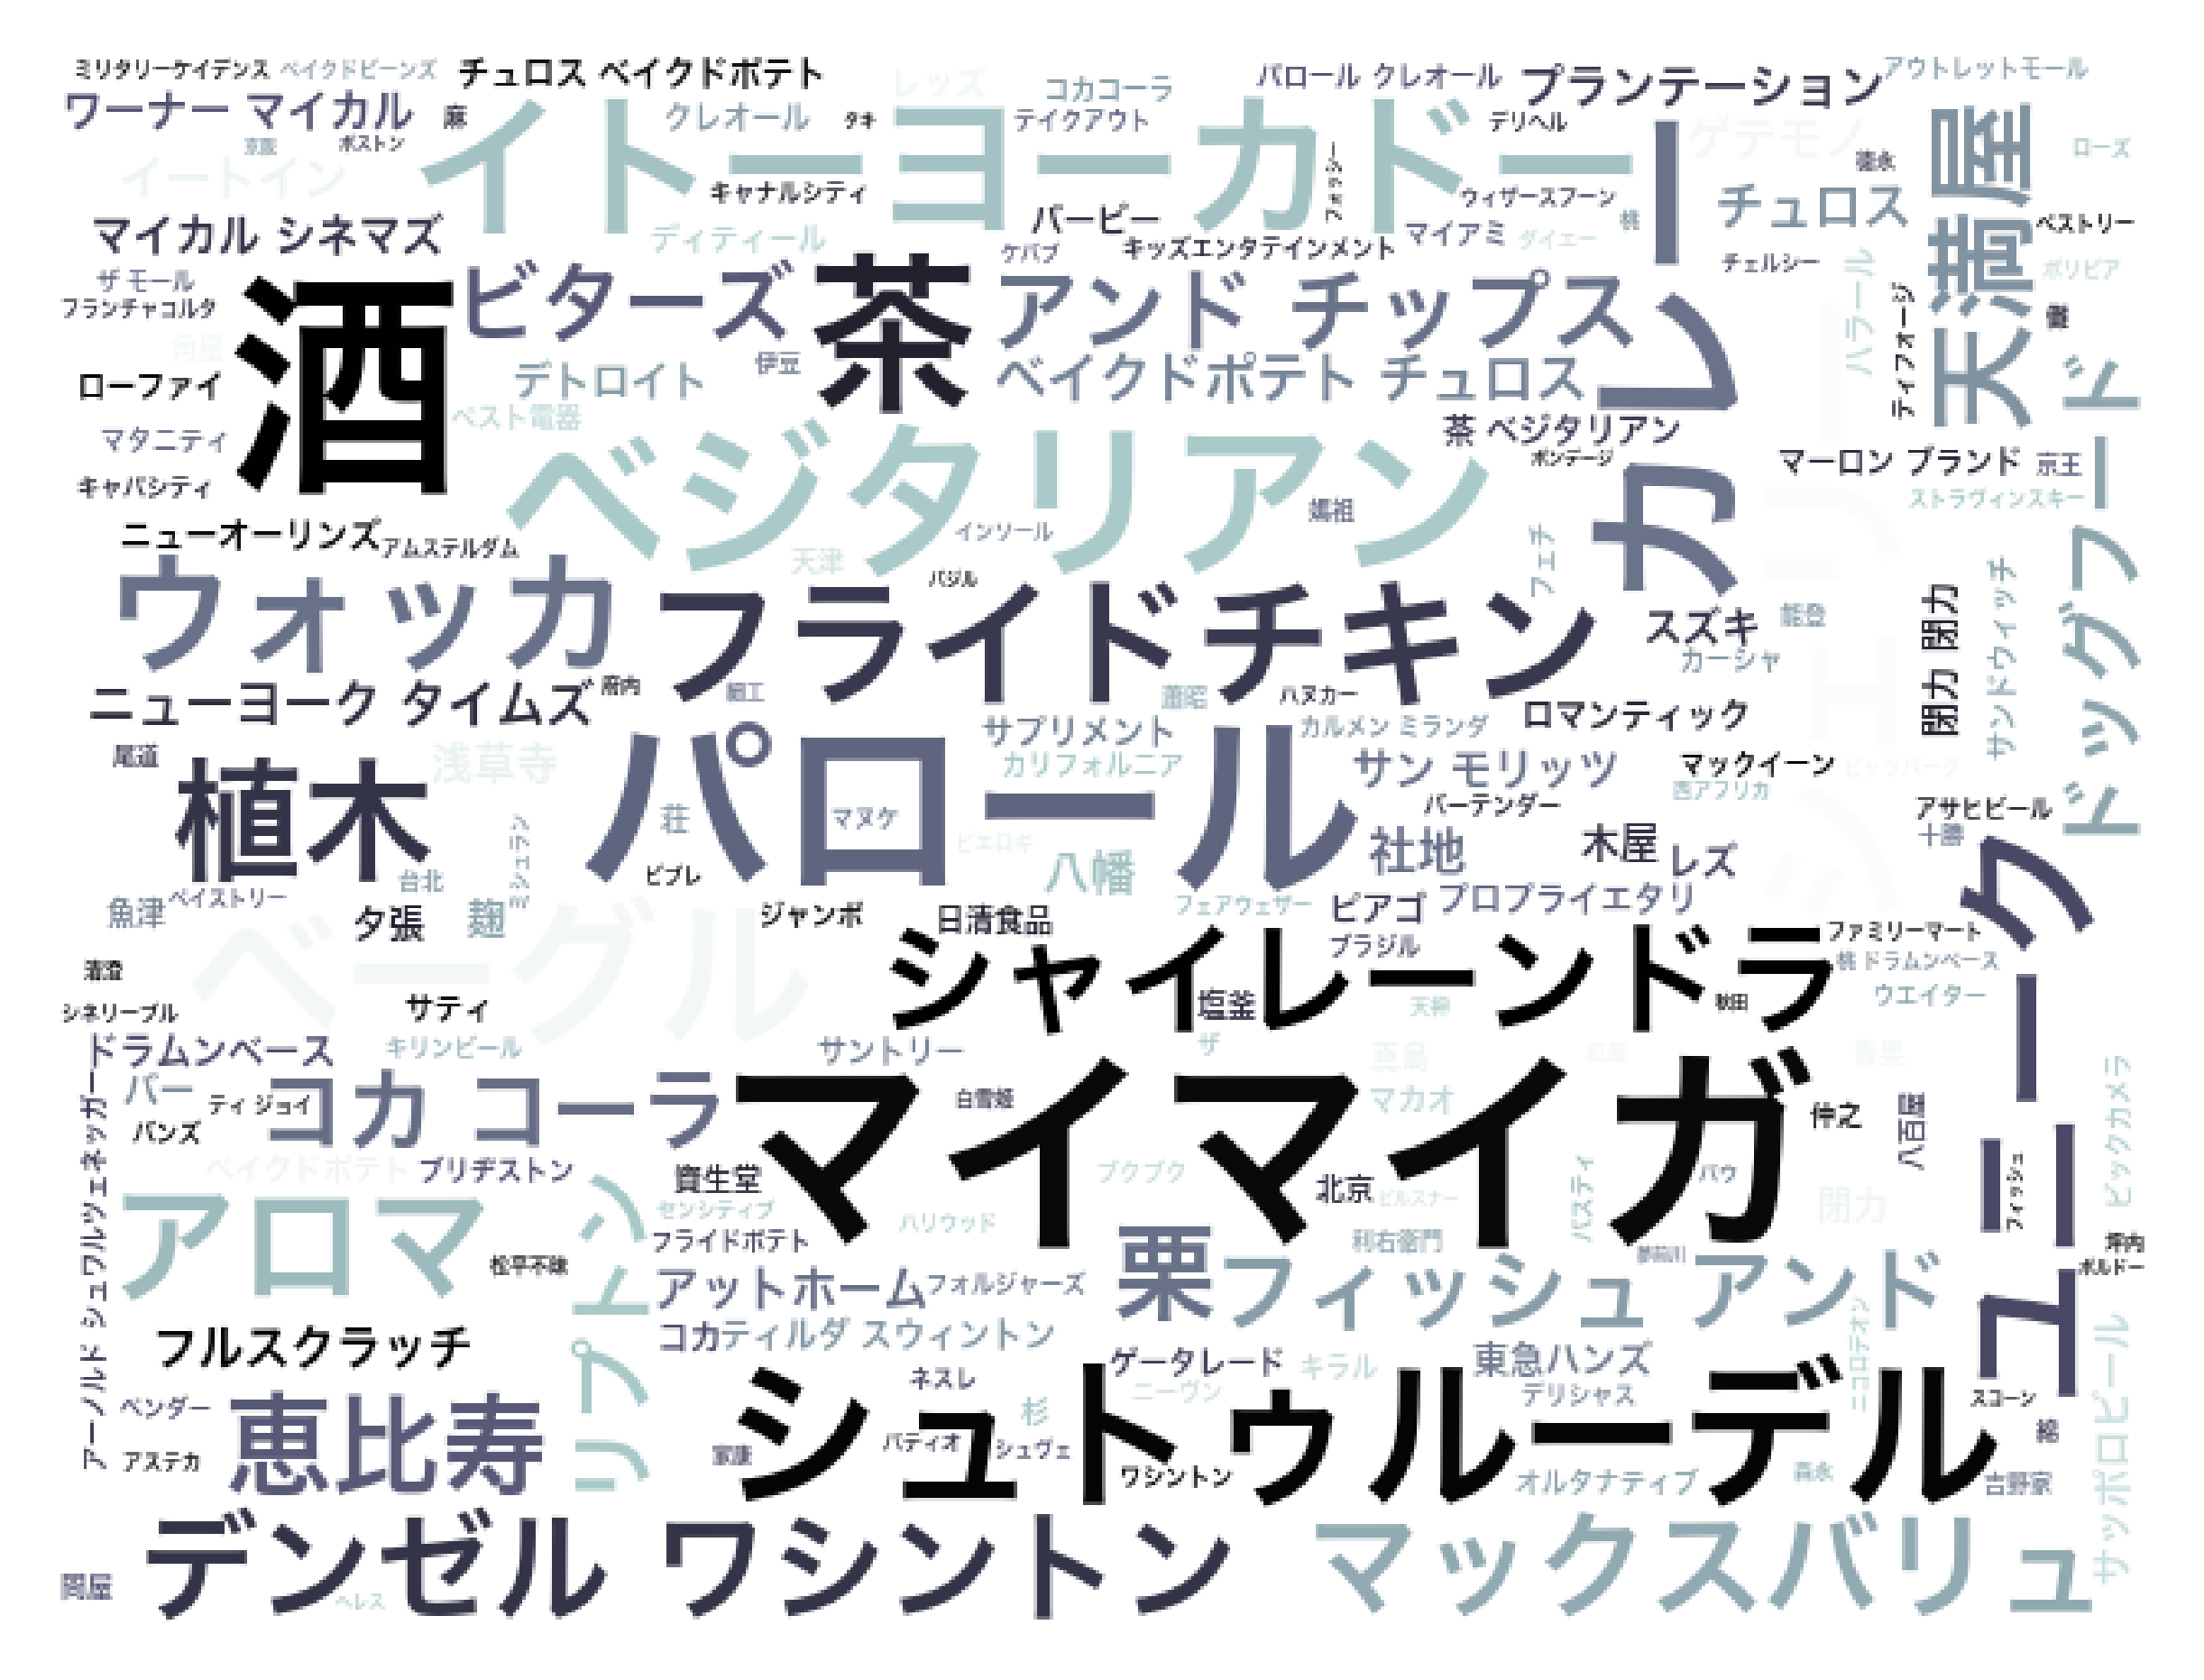

In [93]:
# リストを文字列に変換
word_chain = ' '.join(output_word_list)

font = "/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc"

# ワードクラウド作成
W = WordCloud(width=640, height=480, background_color='white', colormap='bone',font_path =font).generate(word_chain)

plt.figure(figsize=(5,5), dpi=300)
plt.axis("off")
#plt.imshow(W, interpolation="bilinear")
plt.imshow(W)
plt.show()

# 単純なword2vecのmost_similar関数との比較

In [94]:
# 複数の単語で類似度の高いものを上から１０個表示する
most_similar = np.array(list(model.wv.most_similar(imput_word_list, [], 50)))[:,0]
most_similar.tolist()

['ピザ',
 'ハンバーガー',
 'ハンバーグ',
 'シーフード',
 'ステーキ',
 'カレーライス',
 'ソフトクリーム',
 'デザート',
 'お菓子',
 '軽食',
 'スナック菓子',
 'ファーストフード',
 'イタリア料理',
 'フィッシュ・アンド・チップス',
 '焼肉',
 '中国料理',
 '中華料理',
 '焼きそば',
 '惣菜',
 'ポテトチップス',
 '和食',
 'シュークリーム',
 'パフェ',
 'ホットドッグ',
 'たこ焼き',
 '麺類',
 '洋菓子',
 'ケーキ',
 '餃子',
 'イタリアン',
 'サンドイッチ',
 'ファストフード',
 'ソフトドリンク',
 'ファミリーレストラン',
 '菓子',
 '飲み物',
 'お好み焼き',
 '日本料理',
 '寿司',
 'イチゴ',
 'コロッケ',
 'スパゲッティ',
 'フルーツ',
 '菓子パン',
 'ラーメン',
 'トマト',
 'ピーナッツ',
 'チョコレート',
 'しゃぶしゃぶ',
 'ドリンクバー']

In [95]:
values = sorted(c.values(), reverse=True)[:50]

In [96]:
nun_list = []

for i in values:

    keys = [k for k, v in c.items() if v == i]
    nun_list.extend(keys)

In [97]:
set(nun_list)

{'アットホーム',
 'アロマ',
 'イトーヨーカドー',
 'イートイン',
 'ウォッカ',
 'カレー',
 'クレオール',
 'ゲテモノ',
 'コカ・コーラ',
 'サッポロビール',
 'サン・モリッツ',
 'シェリー',
 'シャイレーンドラ',
 'シュトゥルーデル',
 'スズキ',
 'チュロス',
 'デトロイト',
 'デンゼル・ワシントン',
 'ドッグフード',
 'ドラムンベース',
 'ニューヨーク・タイムズ',
 'バー',
 'パロール',
 'ビターズ',
 'フィッシュ・アンド・チップス',
 'フライドチキン',
 'フルスクラッチ',
 'プランテーション',
 'ベイクドポテト',
 'ベジタリアン',
 'ベーグル',
 'マイマイガ',
 'マックスバリュ',
 'ユニーク',
 'リプトン',
 'レズ',
 'ワーナー・マイカル・シネマズ',
 '八幡',
 '夕張',
 '天満屋',
 '恵比寿',
 '木屋',
 '東急ハンズ',
 '栗',
 '植木',
 '浅草寺',
 '社地',
 '茶',
 '酒',
 '閉力',
 '麹'}

In [61]:
import numpy as np

def cal_cos_similarity(q, d):
    return np.dot(q, d) / (np.linalg.norm(q) * np.linalg.norm(d))


cal_cos_similarity(model.wv["のび太"], model.wv["鬼塚"])

0.40635827

In [118]:
lins = "1000000000 1000000000 1000000000"

In [121]:
a = lins.split()

In [122]:
a

['1000000000', '1000000000', '1000000000']